# Linear Regression

<img src="files/figures/LinReg.jpg" width="450px"/>

https://www.statstest.com/multiple-linear-regression/

<div class="alert alert-block alert-info">
    
Consider the following **training set** composed of $N$ observations:

$$
S_{\rm train} = \left\{ \left( \boldsymbol{x_1}, y_1 \right), \dots, \left( \boldsymbol{x_N}, y_N \right) \right\}.
$$

We define the feature matrix $\boldsymbol{X}$ and target vector $\boldsymbol{y}$ as follows:

$$
\boldsymbol{X} =
\begin{pmatrix}
\boldsymbol{x_1} \\
\vdots \\
\boldsymbol{x_N} 
\end{pmatrix}
=
\begin{pmatrix}
x_{11} & \cdots & x_{1p} \\
\vdots & \ddots & \vdots \\
x_{N1} &\cdots & x_{Np}
\end{pmatrix}
\text{ and }
\boldsymbol{y} =
\begin{pmatrix}
y_1 \\
\vdots \\
y_N 
\end{pmatrix}
$$


The solution of the **linear regression (LR)** is the vector
$$\boldsymbol{\hat \beta} = (\hat \beta_0, \dots, \hat \beta_p)$$ which minimizes the **residual sum of squares (RSS)** (distances between predictions et target):

$$
\mathrm{RSS(\boldsymbol{\beta})} 
:= \sum_{i=1}^N \big(\boldsymbol{x_i}^T \boldsymbol{\beta} - y_i \big)^2 
= \| \boldsymbol{X} \boldsymbol{\beta} - \boldsymbol{y} \|^2
$$

We have (cf. course):

$$
\boldsymbol{\hat{\beta}} 
= \underset{\boldsymbol{\beta}}{\arg \min} \left\| \boldsymbol{X} \boldsymbol{\beta} - \boldsymbol{y} \right\|^2 
= (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}
$$
    
</div>

## Libraries

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_theme()

## Data

- Download the **Bottle Database** (csv file) from the **California Cooperative Oceanic Fisheries Investigations (CalOFI)** portal:<br>
download: https://www.kaggle.com/datasets/sohier/calcofi<br>
    info: https://calcofi.org/data/oceanographic-data/bottle-database/
- Import the data and look at them with `pandas`.
- Select only the following colunms of the dataset:<br>
``columns = ["T_degC", "O2Sat", "O2ml_L", "STheta", "O2Sat", "Salnty"]``
- Remove lines that contain empty values.<br>
`data = data[data[columns].notnull().all(1)]`

In [162]:
# Load data
data = pd.read_csv('../z_data/bottle.csv', delimiter=',', low_memory=False)

In [163]:
data.head(5)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
len(data)

864863

In [165]:
columns = ["T_degC", "O2Sat", "O2ml_L", "STheta", "O2Sat", "Salnty"]

In [166]:
data = data[columns]

In [167]:
# Remove nan values.
data = data[data[columns].notnull().all(1)]

In [168]:
len(data)

661268

## Linear Regression (LR)

The **feature variables** are `"O2Sat", "O2ml_L", "STheta", "O2Sat", "Salnty"`.

The **target variable** is `"Salnty"`.

We want to predict the **target** using the **features**.

- Create the feature tensor $\boldsymbol{X}$ (2D) and the target tensor $\boldsymbol{y}$ (1D).
- Shuffle the data and split them into train and test sets:<br>
(80% train / 20% test, use `train_test_split(...)`)
- **Implement in `numpy` the LR solution $\boldsymbol{\hat \beta}$ using the train dataset.**<br>
(use `np.linalg.pinv()` for matrix inversion)
- Compute the predictions $\boldsymbol{\hat y}$ on the train and test sets.
- Plot the true values $\boldsymbol{y}$ vs predictions $\boldsymbol{\hat y}$ for the train and test sets: if the predictions are good, the graph should look diagonal (why?).

In [182]:
features = columns[:-1]
response = [columns[-1]]

features, response

(['T_degC', 'O2Sat', 'O2ml_L', 'STheta', 'O2Sat'], ['Salnty'])

In [183]:
X = data[features]
y = data[response]

In [184]:
X.head()

,T_degC,O2Sat,O2Sat,O2ml_L,STheta,O2Sat,O2Sat
2160,10.30,92.8,92.8,5.90,25.364,92.8,92.8
2161,18.46,111.8,111.8,6.02,23.568,111.8,111.8
2162,10.29,95.0,95.0,6.04,25.304,95.0,95.0
2163,10.29,95.3,95.3,6.06,25.335,95.3,95.3
2164,10.33,95.1,95.1,6.04,25.339,95.1,95.1


In [185]:
y.head()

,Salnty
2160,33.030
2161,32.920
2162,32.951
2163,32.990
2164,33.005


In [186]:
# Converting into numpy arrays
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((661268, 7), (661268, 1))

In [187]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
X_train.shape, y_train.shape

((529014, 7), (529014, 1))

In [189]:
X_test.shape, y_test.shape

((132254, 7), (132254, 1))

#### Closed-form solution

In [177]:
# Compute solution of LR

beta_hat = np.matmul(X_train.T, X_train)
beta_hat = np.linalg.pinv(beta_hat)
beta_hat = np.matmul(beta_hat, X_train.T)
beta_hat = np.matmul(beta_hat, y_train)

In [178]:
beta_hat

array([[ 0.19004836],
       [ 0.01025901],
       [ 0.01025901],
       [-0.68832279],
       [ 1.23134316],
       [ 0.01025901],
       [ 0.01025901]])

In [179]:
y_train_preds = np.matmul(X_train, beta_hat)
y_test_preds = np.matmul(X_test, beta_hat)

y_train_preds.shape, y_test_preds.shape

((529014, 1), (132254, 1))

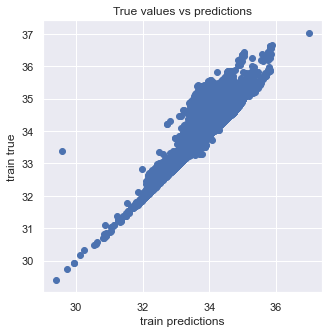

In [180]:
plt.figure(figsize=(5, 5))

plt.xlabel("train predictions")
plt.ylabel("train true")
plt.title("True values vs predictions")
plt.scatter(y_train_preds, y_train)

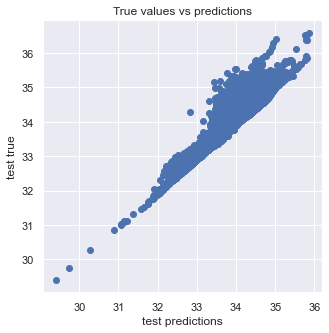

In [181]:
plt.figure(figsize=(5, 5))

plt.xlabel("test predictions")
plt.ylabel("test true")
plt.title("True values vs predictions")
plt.scatter(y_test_preds, y_test)

**Conclusion:** Normally, we would do a more complex data analyis - investigate feature correlations, etc. - and then use a dedicated ML library to implement the model.

Here, at least once in your life, you implemented the **linear regression** by yourself.